# NLP Coursework Data Analysis

## Setup

## Imports

In [28]:
import nltk

nltk.download("stopwords")
nltk.download("punkt")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import pandas as pd
import numpy as np


from tqdm import tqdm
from pprint import pprint
from operator import itemgetter
from matplotlib import pyplot as plot

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Load Dataset

In [29]:
fields = ["idx", "id", "category", "language", "text", "score"]

with open("data/dontpatronizeme_pcl.tsv", "r") as f:
    df = pd.read_csv(f, delimiter="\t", names=fields, header=None)

df.dropna()

df["score"].update(df["score" ].apply(int))
#df["score"].update(df["score" ].apply(lambda x: 1 if x > 0 else 0))

patronising_df = df.loc[df["score"] > 0]
unpatronising_df = df.loc[df["score"] == 0]

print(patronising_df.shape, unpatronising_df.shape)

(1940, 6) (8529, 6)


## Data Analysis

### General Info

#### Balance of Classes

Text(0.5, 0, 'Score')

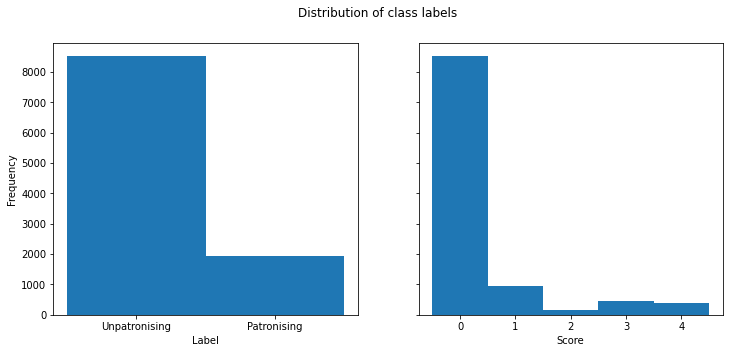

In [30]:
figure, (binary_ax, multi_ax) = plot.subplots(1, 2, sharey=True)

figure.suptitle("Distribution of class labels")
figure.set_size_inches((12, 5))

df["score"].map(lambda x: "Patronising" if x > 0 else "Unpatronising") \
    .hist(ax=binary_ax, bins=[-0.5, 0.5, 1.5], grid=False) 

df["score"].hist(ax=multi_ax, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], grid=False) 

binary_ax.set_ylabel("Frequency")
binary_ax.set_xlabel("Label")
multi_ax.set_xlabel("Score")

#### Distribution of Languages

Text(0.5, 0, 'Language')

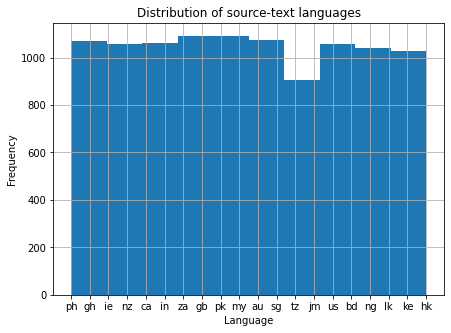

In [31]:
df["language"].hist(figsize=(7, 5))

plot.title("Distribution of source-text languages")
plot.ylabel("Frequency")
plot.xlabel("Language")

## Text Analysis

#### Average Character Length

5493.0


(0.0, 2000.0)

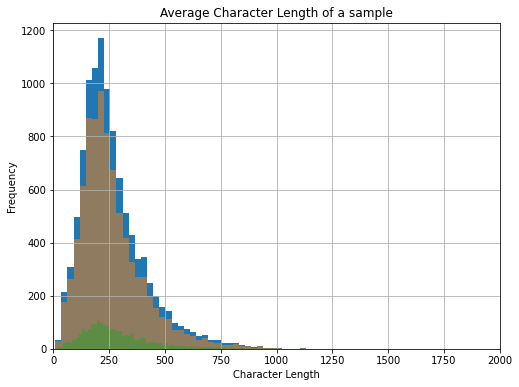

In [32]:
series = df["text"].str.len()

print(series.max())
series.hist(bins=200, figsize=(8, 6))

unpatronising_df["text"].str.len().hist(bins=200, alpha=0.5, figsize=(8, 6))
patronising_df["text"].str.len().hist(bins=200, alpha=0.5, figsize=(8, 6))

plot.title("Average Character Length of a sample")
plot.ylabel("Frequency")
plot.xlabel("Character Length")

plot.xlim((0, 2000))

#### Average Number of Words

909


(0.0, 300.0)

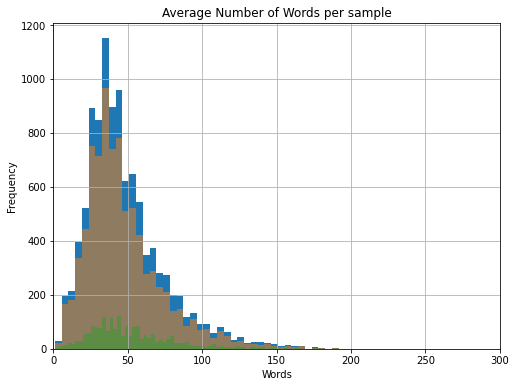

In [33]:
def get_list_length(x):
    if type(x) != list:
        x = [str(x)]

    return len(x)

series = df["text"].str.split() \
    .map(get_list_length)

print(series.max())
series.hist(bins=200, figsize=(8, 6))

unpatronising_df["text"].str.split() \
    .map(get_list_length) \
    .hist(bins=200, alpha=0.5, figsize=(8, 6))

patronising_df["text"].str.split() \
    .map(get_list_length) \
    .hist(bins=200, alpha=0.5, figsize=(8, 6))

plot.title("Average Number of Words per sample")
plot.ylabel("Frequency")
plot.xlabel("Words")

plot.xlim((0, 300))

#### Average Word Length

9.0


(0.0, 10.0)

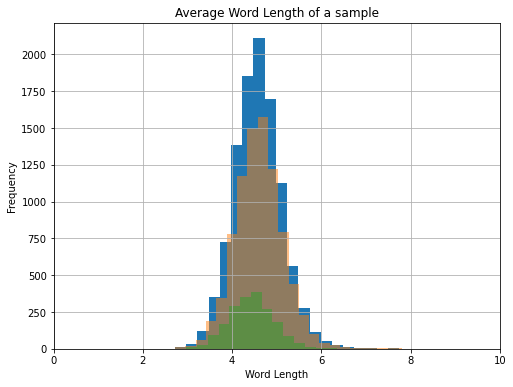

In [34]:
def mean_item_length(x):
    if type(x) != list:
        x = [str(x)]
    
    lengths = list(map(len, x))
    return np.mean(lengths)

series = df["text"].str.split() \
    .map(mean_item_length) \

print(series.max())
series.hist(bins=25, figsize=(8, 6))

unpatronising_df["text"].str.split() \
    .map(mean_item_length) \
    .hist(bins=25, alpha=0.5, figsize=(8, 6))

patronising_df["text"].str.split() \
    .map(mean_item_length) \
    .hist(bins=25, alpha=0.5, figsize=(8, 6))

plot.title("Average Word Length of a sample")
plot.ylabel("Frequency")
plot.xlabel("Word Length")

plot.xlim((0, 10))

### $ n $-gram Analysis

In [35]:
def is_not_stopword(x):
    return x not in stopwords.words()

def get_n_gram_frequency(n, sentences):
    n_grams = dict()

    for sentence in tqdm(sentences, unit="sentence"):
        if type(sentence) != str:
            continue

        words = list(filter(is_not_stopword, word_tokenize(sentence)))
    
        for i in range(len(words) + 1 - n):
            n_gram = " ".join(words[i:i+n])

            if n_gram in n_grams:
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1
    
    return list(zip(n_grams.keys(), n_grams.values()))


In [36]:
n = 3

patr_n_gram = get_n_gram_frequency(n, patronising_df["text"])
unpatr_n_gram = get_n_gram_frequency(n, unpatronising_df["text"])

print(len(patr_n_gram), len(unpatr_n_gram))

common_patr_n_gram = sorted(patr_n_gram, key=itemgetter(1), 
                            reverse=True)[:50]

common_unpatr_n_gram = sorted(unpatr_n_gram, key=itemgetter(1), 
                              reverse=True)[:50]

common_patr_n_gram_words = set(map(itemgetter(0), common_patr_n_gram))
common_unpatr_n_gram_words = set(map(itemgetter(0), common_unpatr_n_gram))

common_n_grams = set.intersection(common_patr_n_gram_words, common_unpatr_n_gram_words)
print(f"Common {n}-grams between the patronising and unpatronising datasets.")
pprint(common_n_grams)

patr_difference_n_grams = common_patr_n_gram_words.difference(common_unpatr_n_gram_words)
print(f"{n}-grams in the patronising set but not in the unpatronising set.")
pprint(patr_difference_n_grams)

unpatr_difference_n_grams = common_unpatr_n_gram_words.difference(common_patr_n_gram_words)
print(f"{n}-grams in the unpatronising set but not in the patronising set.")
pprint(unpatr_difference_n_grams)

KeyboardInterrupt: 